In [1]:
import numpy as np
import pandas as pd
from IPython.display import display, Markdown, Latex
from sklearn import datasets
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from kneed import KneeLocator
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

from sklearn.model_selection import train_test_split, cross_validate
from sklearn.model_selection import cross_val_score, cross_val_predict

In [2]:
df = pd.read_csv('Bank_CreditScoring.csv')
df.head()

Credit_Card_Exceed_Months Employment_Type  Loan_Amount  Loan_Tenure_Year  \
0                          1        employer       456509                16   
1                          1        employer       605505                19   
2                          1        employer       294133                19   
3                          1        employer       490216                20   
4                          1        employer       292728                14   

  More_Than_One_Products  Credit_Card_More_Than_Months  Number_of_Dependents  \
0                    yes                             1                     2   
1                     no                             1                     2   
2                    yes                             1                     2   
3                     no                             1                     2   
4                    yes                             1                     2   

   Years_to_Financial_Freedom  Number_of_Credit_Card_Facility  \
0                           5                               2   
1                           5                               2   
2                           5                               2   
3                           5                               2   
4                           5                               2   

   Number_of_Properties  ...  Number_of_Loan_to_Approve  Property_Type  \
0                     2  ...                          1    condominium   
1                     2  ...                          2    condominium   
2                     2  ...                          3    condominium   
3                     2  ...                          1    condominium   
4                     2  ...                          2    condominium   

  Years_for_Property_to_Completion  State Number_of_Side_Income  \
0                               10  Johor                     2   
1                               10  Johor                     2   
2                               10  Johor                     2   
3                               10  Johor                     1   
4                               10  Johor                     3   

   Monthly_Salary  Total_Sum_of_Loan  Total_Income_for_Join_Application  \
0           12262             853141                              16025   
1            9251             882901                              17082   
2            4919             540489                              12613   
3            4459             536727                              10952   
4            5628             774695                              11209   

   Decision Score  
0    Reject     7  
1    Accept     9  
2    Reject     8  
3    Accept     9  
4    Reject     8  

[5 rows x 21 columns]

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2350 entries, 0 to 2349
Data columns (total 21 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   Credit_Card_Exceed_Months          2350 non-null   int64 
 1   Employment_Type                    2350 non-null   object
 2   Loan_Amount                        2350 non-null   int64 
 3   Loan_Tenure_Year                   2350 non-null   int64 
 4   More_Than_One_Products             2350 non-null   object
 5   Credit_Card_More_Than_Months       2350 non-null   int64 
 6   Number_of_Dependents               2350 non-null   int64 
 7   Years_to_Financial_Freedom         2350 non-null   int64 
 8   Number_of_Credit_Card_Facility     2350 non-null   int64 
 9   Number_of_Properties               2350 non-null   int64 
 10  Number_of_Bank_Products            2350 non-null   int64 
 11  Number_of_Loan_to_Approve          2350 non-null   int64 
 12  Proper

In [6]:
display(Markdown("#### Explore the Values of Text Columns:"))
cols = ['Employment_Type', 'More_Than_One_Products', 'Property_Type', 'State', 'Decision']
for col in cols:
    line = "**" + col + ":** "
    for v in df[col].unique():
        line = line + str(v) + ", "
    display(Markdown(line))

#### Explore the Values of Text Columns:

**Employment_Type:** employer, Self_Employed, government, employee, Fresh_Graduate, 

**More_Than_One_Products:** yes, no, 

**Property_Type:** condominium, bungalow, terrace, flat, 

**State:** Johor, Selangor, Kuala Lumpur, Penang, P.Pinang, Pulau Penang, Johor B, K.L, N.Sembilan, N.S, Sarawak, Sabah, SWK, Trengganu, Kedah, 

**Decision:** Reject, Accept, 

From above exploration:

All the columns, i.e. "Employment_Type", "More_Than_One_Products", "Property_Type", "State" and "Decision" are Nominal data.


In [3]:
replacement_mapping_dict = {
    "Johor B": "Johor",
    "P.Pinang": "Penang",
    "Pulau Penang": "Penang",
    "K.L": "Kuala Lumpur",
    "N.Sembilan": "Negeri Sembilan",
    "N.S": "Negeri Sembilan",
    "SWK": "Sarawak",
    "Trengganu": "Terengganu"
}
df["State"].replace(replacement_mapping_dict, inplace=True)
df.State.unique()

array(['Johor', 'Selangor', 'Kuala Lumpur', 'Penang', 'Negeri Sembilan',
       'Sarawak', 'Sabah', 'Terengganu', 'Kedah'], dtype=object)

In [4]:
df.describe()

Credit_Card_Exceed_Months    Loan_Amount  Loan_Tenure_Year  \
count                2350.000000    2350.000000       2350.000000   
mean                    4.723404  448350.120851         17.053191   
std                     2.101127  202814.886797          4.352123   
min                     1.000000  100194.000000         10.000000   
25%                     3.000000  273169.250000         13.000000   
50%                     5.000000  447251.500000         17.000000   
75%                     7.000000  623714.000000         21.000000   
max                     7.000000  799628.000000         24.000000   

       Credit_Card_More_Than_Months  Number_of_Dependents  \
count                    2350.00000            2350.00000   
mean                        2.12766               3.12766   
std                         1.40874               1.40874   
min                         1.00000               2.00000   
25%                         1.00000               2.00000   
50%                         1.00000               2.00000   
75%                         3.00000               4.00000   
max                         5.00000               6.00000   

       Years_to_Financial_Freedom  Number_of_Credit_Card_Facility  \
count                 2350.000000                     2350.000000   
mean                    13.382979                        3.744681   
std                      4.067090                        1.391271   
min                      5.000000                        2.000000   
25%                     10.000000                        2.000000   
50%                     14.000000                        4.000000   
75%                     17.000000                        5.000000   
max                     19.000000                        6.000000   

       Number_of_Properties  Number_of_Bank_Products  \
count           2350.000000              2350.000000   
mean               2.382979                 2.106383   
std                0.813707                 1.533423   
min                2.000000                 1.000000   
25%                2.000000                 1.000000   
50%                2.000000                 1.000000   
75%                2.000000                 3.000000   
max                5.000000                 5.000000   

       Number_of_Loan_to_Approve  Years_for_Property_to_Completion  \
count                2350.000000                       2350.000000   
mean                    1.991915                         10.659574   
std                     0.816717                          1.077590   
min                     1.000000                         10.000000   
25%                     1.000000                         10.000000   
50%                     2.000000                         10.000000   
75%                     3.000000                         11.000000   
max                     3.000000                         13.000000   

       Number_of_Side_Income  Monthly_Salary  Total_Sum_of_Loan  \
count            2350.000000     2350.000000       2.350000e+03   
mean                2.020426     7972.040000       9.435756e+05   
std                 0.818325     2588.330436       2.909033e+05   
min                 1.000000     3583.000000       4.202390e+05   
25%                 1.000000     5737.750000       7.007870e+05   
50%                 2.000000     7982.500000       9.375275e+05   
75%                 3.000000    10227.750000       1.197191e+06   
max                 3.000000    12562.000000       1.449960e+06   

       Total_Income_for_Join_Application        Score  
count                        2350.000000  2350.000000  
mean                        13767.859574     7.496596  
std                          3591.707735     1.112542  
min                          7523.000000     6.000000  
25%                         10751.500000     6.000000  
50%                         13689.500000     8.000000  
75%                         16916.250000     8.000000  
max                      

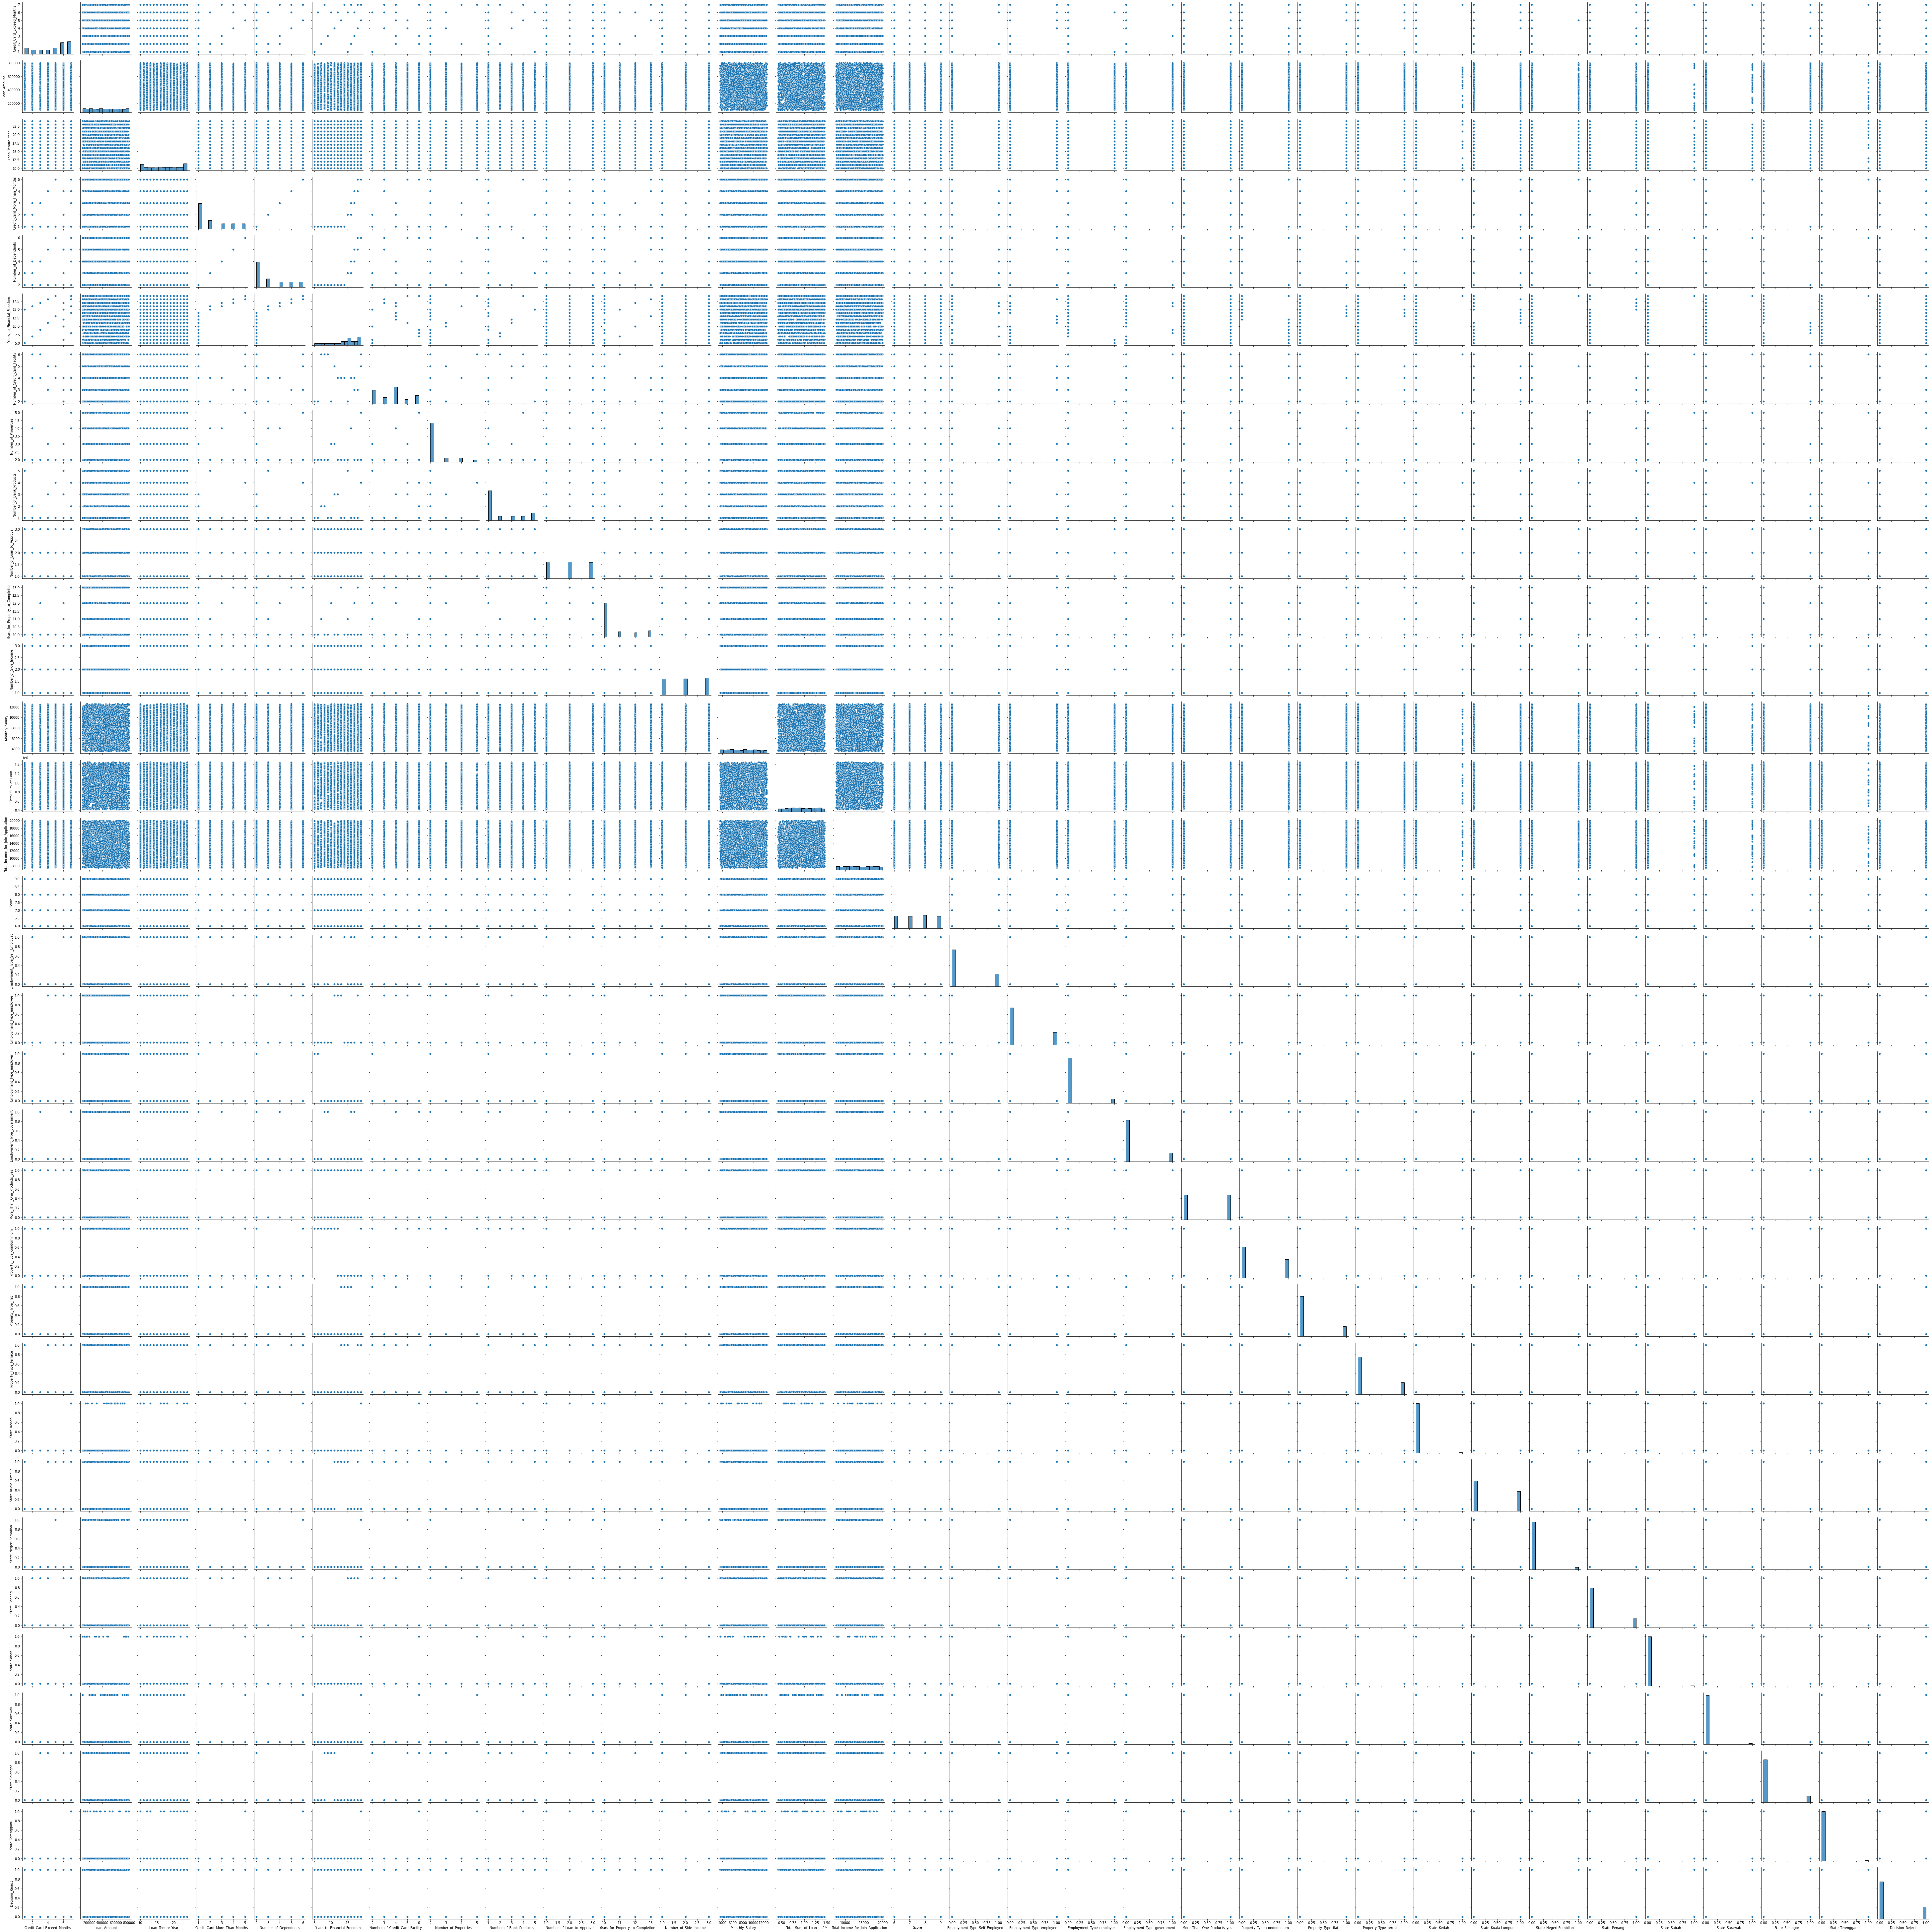

In [5]:
sns.pairplot(df_1he)


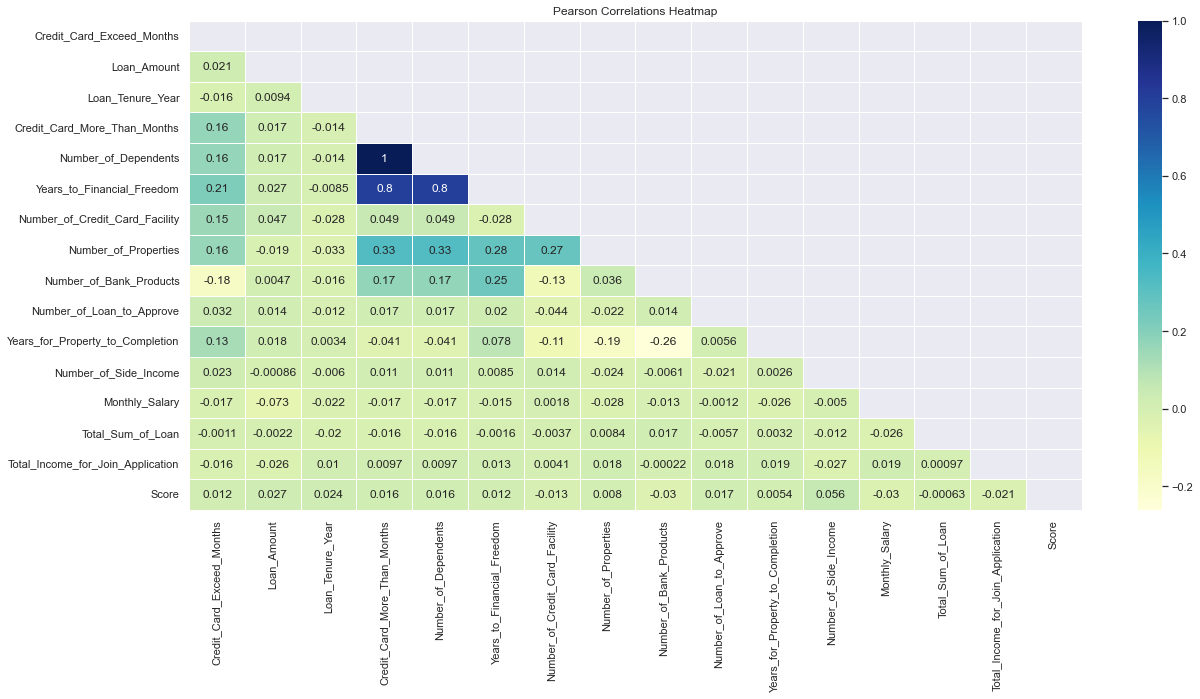

In [8]:
corr = df_1he.corr()
sns.set(rc={'figure.figsize':(20,9)})
sns.heatmap(corr,linewidths=.5, annot=True, cmap="YlGnBu",mask=np.triu(np.ones_like(corr, dtype=bool)))\
    .set_title("Pearson Correlations Heatmap");

In [28]:
df_1he = pd.get_dummies(df, drop_first=True)
df_1he.iloc[:, 0:15] = StandardScaler().fit_transform(df_1he.iloc[:, 0:15])

In [9]:
#big range data
#Loan_Amount, Monthly_Salary, Total_Sum_of_Loan, Total_Income_for_Join_Application

In [11]:
#ss = StandardScaler()
#df_1he_scaled = pd.DataFrame(ss.fit_transform(df_1he), columns = df_1he.columns, index=df_1he.index)
#df_1he_scaled

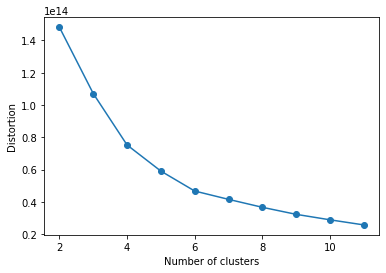

In [13]:
sse = []
for i in range(2,12):
    km = KMeans(
        n_clusters=i, init='k-means++',
        n_init=50, max_iter=500,
        random_state=0, algorithm='elkan'
    )
    km.fit(df_1he)
    sse.append(km.inertia_)
    
plt.plot(range(2,12), sse, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

In [ ]:
from sklearn.metrics import silhouette_samples, silhouette_score

clusters_range = range(2,15)
results = []
for c in clusters_range:
    clusterer = KMeans(init='k-means++',n_clusters=c,n_init=100,random_state=0)
    cluster_labels = clusterer.fit_predict(normalized_df)
    

In [13]:
kl = KneeLocator(
    range(1, 11), sse, curve="convex", direction="decreasing"
    )
kl.elbow

4

In [14]:
silhouette_coefficients = []
for i in range(2, 12):
    km = KMeans(
    n_clusters=i, init='k-means++',
    n_init=50, max_iter=500,
    random_state=0, algorithm='elkan'
    )
    km.fit(df_1he)
    score = silhouette_score(df_1he, km.labels_)
    silhouette_coefficients.append(score)

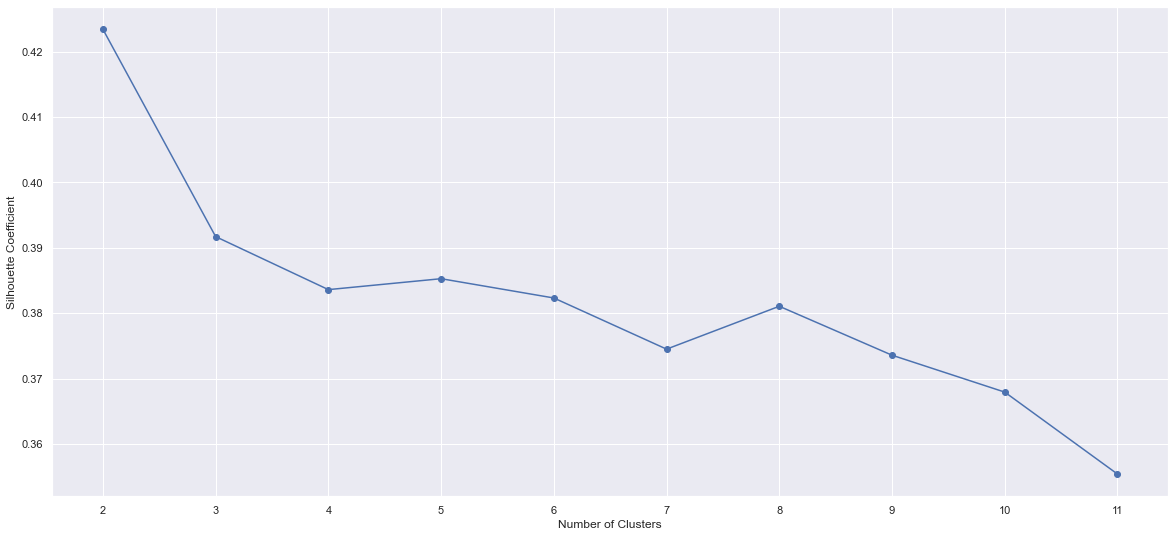

In [15]:
plt.plot(range(2, 12), silhouette_coefficients, marker='o')
plt.xticks(range(2, 12))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

In [29]:
df_1he.dtypes

Credit_Card_Exceed_Months            float64
Loan_Amount                          float64
Loan_Tenure_Year                     float64
Credit_Card_More_Than_Months         float64
Number_of_Dependents                 float64
Years_to_Financial_Freedom           float64
Number_of_Credit_Card_Facility       float64
Number_of_Properties                 float64
Number_of_Bank_Products              float64
Number_of_Loan_to_Approve            float64
Years_for_Property_to_Completion     float64
Number_of_Side_Income                float64
Monthly_Salary                       float64
Total_Sum_of_Loan                    float64
Total_Income_for_Join_Application    float64
Score                                  int64
Employment_Type_Self_Employed          uint8
Employment_Type_employee               uint8
Employment_Type_employer               uint8
Employment_Type_government             uint8
More_Than_One_Products_yes             uint8
Property_Type_condominium              uint8
Property_T

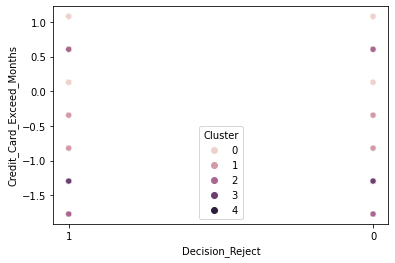

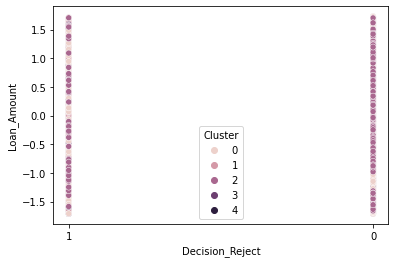

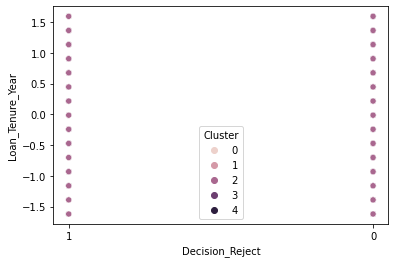

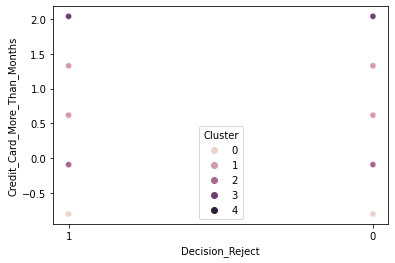

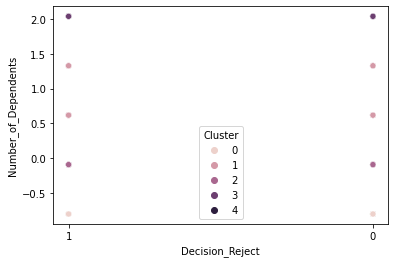

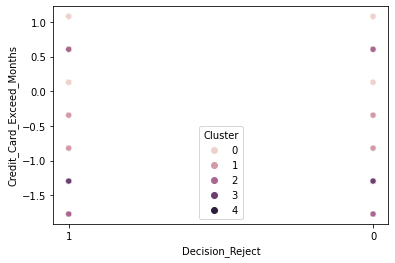

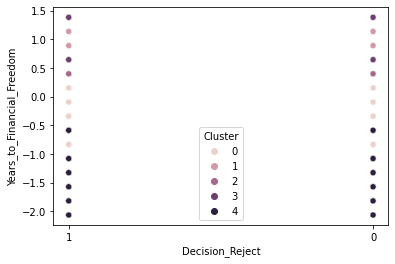

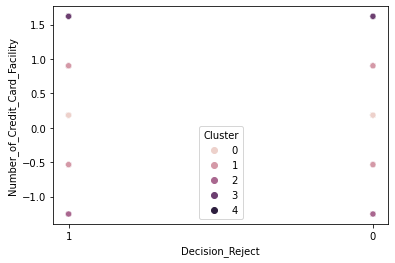

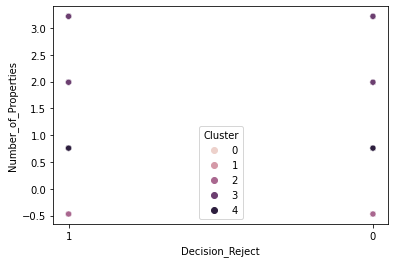

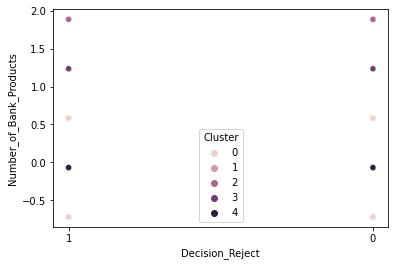

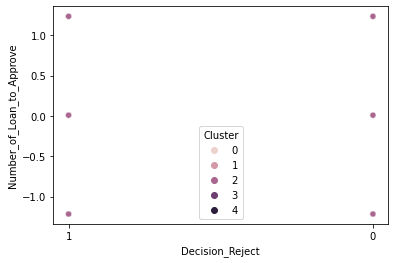

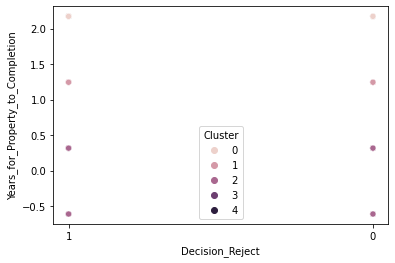

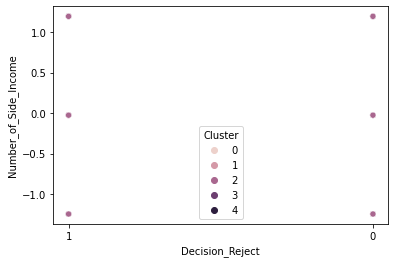

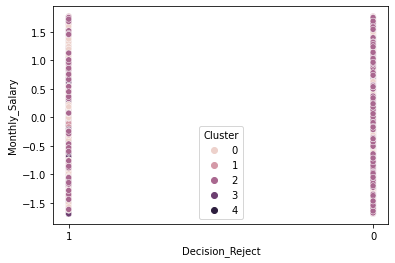

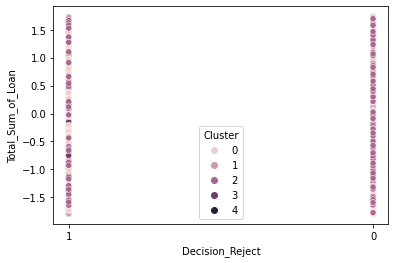

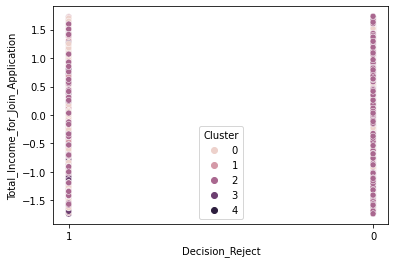

In [37]:
km = KMeans(
    n_clusters=5, init='k-means++',
    n_init=50, max_iter=500,
    random_state=0, algorithm='elkan'
    )
clusters = km.fit_predict(df_1he)

df_clustered = df_1he.copy()
df_clustered["Cluster"] = clusters
sns.scatterplot(x="Decision_Reject", y="Credit_Card_Exceed_Months", hue="Cluster", data=df_clustered)
plt.show()
sns.scatterplot(x="Decision_Reject", y="Loan_Amount", hue="Cluster", data=df_clustered)
plt.show()
sns.scatterplot(x="Decision_Reject", y="Loan_Tenure_Year", hue="Cluster", data=df_clustered)
plt.show()
sns.scatterplot(x="Decision_Reject", y="Credit_Card_More_Than_Months", hue="Cluster", data=df_clustered)
plt.show()
sns.scatterplot(x="Decision_Reject", y="Number_of_Dependents", hue="Cluster", data=df_clustered)
plt.show()
sns.scatterplot(x="Decision_Reject", y="Credit_Card_Exceed_Months", hue="Cluster", data=df_clustered)
plt.show()
sns.scatterplot(x="Decision_Reject", y="Years_to_Financial_Freedom", hue="Cluster", data=df_clustered)
plt.show()
sns.scatterplot(x="Decision_Reject", y="Number_of_Credit_Card_Facility", hue="Cluster", data=df_clustered)
plt.show()
sns.scatterplot(x="Decision_Reject", y="Number_of_Properties", hue="Cluster", data=df_clustered)
plt.show()
sns.scatterplot(x="Decision_Reject", y="Number_of_Bank_Products", hue="Cluster", data=df_clustered)
plt.show()
sns.scatterplot(x="Decision_Reject", y="Number_of_Loan_to_Approve", hue="Cluster", data=df_clustered)
plt.show()
sns.scatterplot(x="Decision_Reject", y="Years_for_Property_to_Completion", hue="Cluster", data=df_clustered)
plt.show()
sns.scatterplot(x="Decision_Reject", y="Number_of_Side_Income", hue="Cluster", data=df_clustered)
plt.show()
sns.scatterplot(x="Decision_Reject", y="Monthly_Salary", hue="Cluster", data=df_clustered)
plt.show()
sns.scatterplot(x="Decision_Reject", y="Total_Sum_of_Loan", hue="Cluster", data=df_clustered)
plt.show()
sns.scatterplot(x="Decision_Reject", y="Total_Income_for_Join_Application", hue="Cluster", data=df_clustered)
plt.show() 

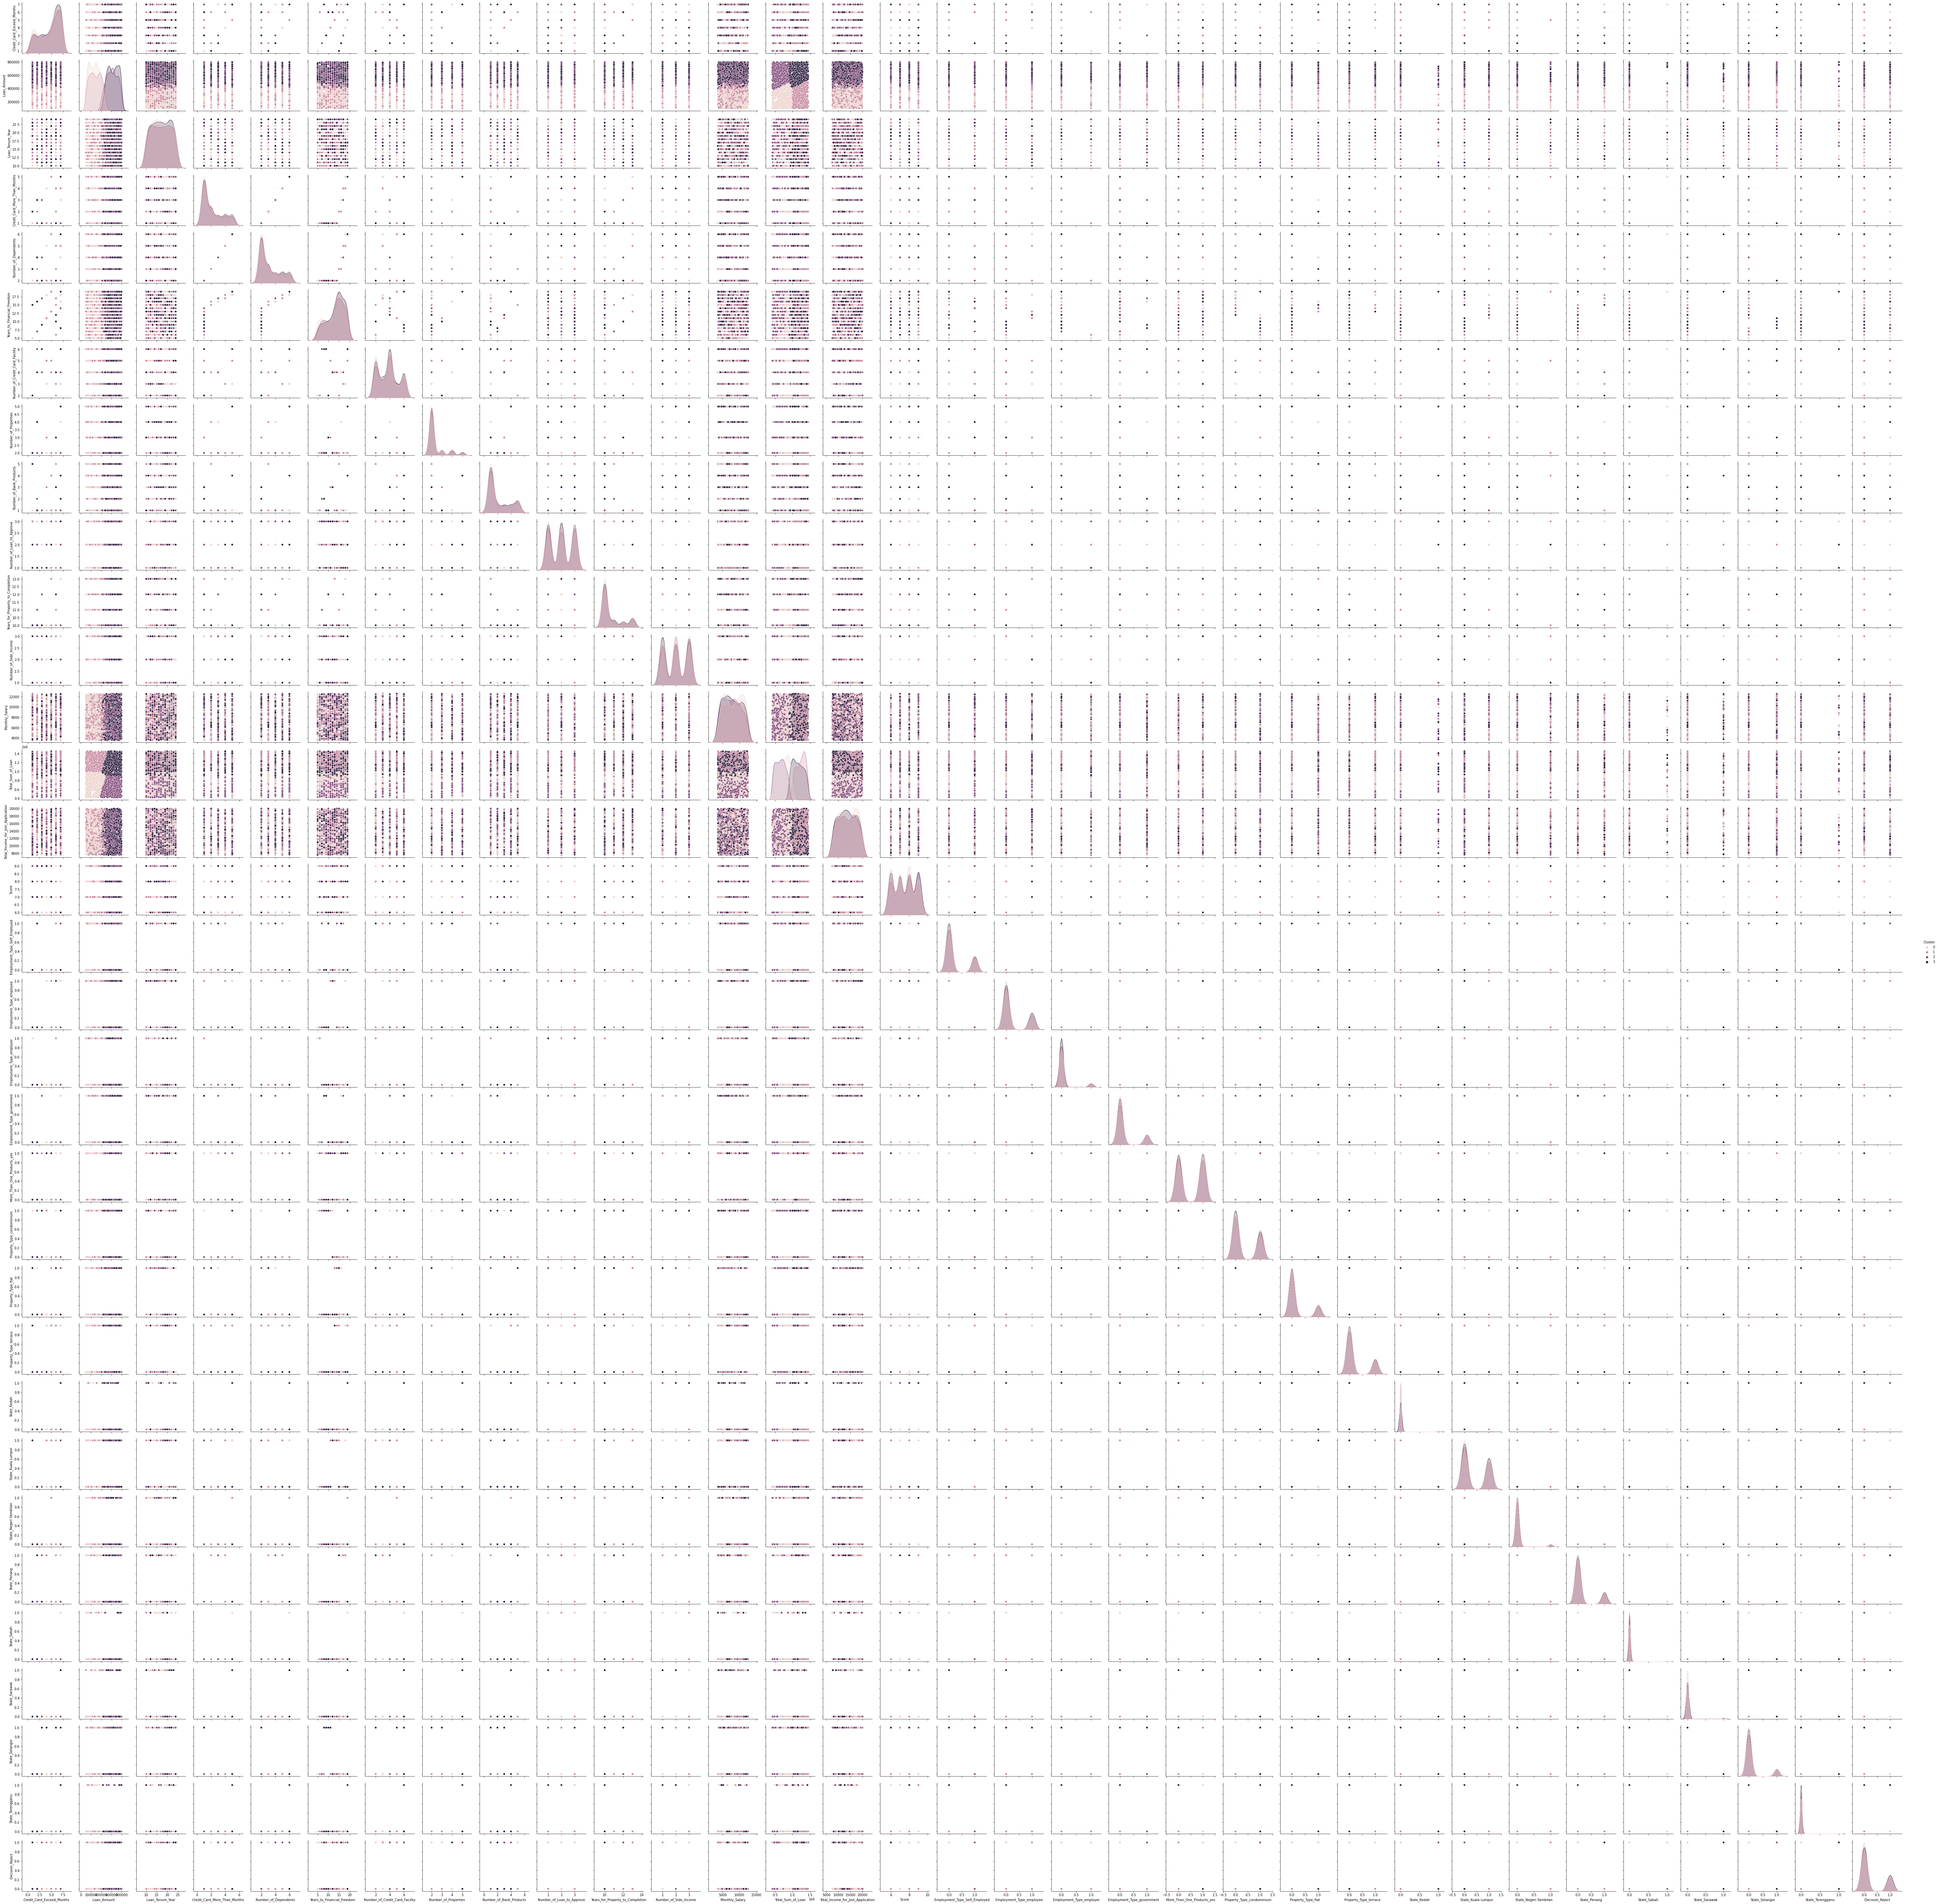

In [14]:
km = KMeans(
    n_clusters=4, init='k-means++',
    n_init=50, max_iter=500,
    random_state=0, algorithm='elkan'
    )
clusters = km.fit_predict(df_1he)

df_clustered = df_1he.copy()
df_clustered["Cluster"] = clusters
sns.pairplot(df_clustered, hue="Cluster");

In [12]:
df.dtypes

Credit_Card_Exceed_Months             int64
Employment_Type                      object
Loan_Amount                           int64
Loan_Tenure_Year                      int64
More_Than_One_Products               object
Credit_Card_More_Than_Months          int64
Number_of_Dependents                  int64
Years_to_Financial_Freedom            int64
Number_of_Credit_Card_Facility        int64
Number_of_Properties                  int64
Number_of_Bank_Products               int64
Number_of_Loan_to_Approve             int64
Property_Type                        object
Years_for_Property_to_Completion      int64
State                                object
Number_of_Side_Income                 int64
Monthly_Salary                        int64
Total_Sum_of_Loan                     int64
Total_Income_for_Join_Application     int64
Decision                             object
Score                                 int64
dtype: object

In [17]:
#X=df.drop('Score',axis=1)
#y=df['Score']
df_1he.dtypes


Credit_Card_Exceed_Months             int64
Loan_Amount                           int64
Loan_Tenure_Year                      int64
Credit_Card_More_Than_Months          int64
Number_of_Dependents                  int64
Years_to_Financial_Freedom            int64
Number_of_Credit_Card_Facility        int64
Number_of_Properties                  int64
Number_of_Bank_Products               int64
Number_of_Loan_to_Approve             int64
Years_for_Property_to_Completion      int64
Number_of_Side_Income                 int64
Monthly_Salary                        int64
Total_Sum_of_Loan                     int64
Total_Income_for_Join_Application     int64
Score                                 int64
Employment_Type_Self_Employed         uint8
Employment_Type_employee              uint8
Employment_Type_employer              uint8
Employment_Type_government            uint8
More_Than_One_Products_yes            uint8
Property_Type_condominium             uint8
Property_Type_flat              

In [30]:
df_1he.Decision_Reject = df_1he['Decision_Reject'].apply(str)
X = df_1he[['Loan_Amount','Loan_Tenure_Year','Total_Sum_of_Loan']]
y = df_1he["Decision_Reject"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

In [42]:
Classifications = {
    "K-Nearest":KNeighborsClassifier(),
    "SVC1": SVC(kernel='rbf'),
    "SVC3": SVC(kernel='linear'),
    "SVC4": SVC(kernel='sigmoid'),
    "DecisionTree": DecisionTreeClassifier(),
    "RandomForest": RandomForestClassifier(),
    "GaussianNaiveBayes": GaussianNB()
}

In [43]:
cv_results = pd.DataFrame(columns=['model', 'train_score', 'test_score'])
for key in Classifications.keys():
    cv_res = cross_validate(Classifications[key], X_train, y_train, 
                                             return_train_score=True,
                                             scoring="accuracy",
                                             cv=5, n_jobs=-1)
    res = {
        'model': key, 
        'train_score': cv_res["train_score"].mean(), 
        'test_score': cv_res["test_score"].mean(),
        }
    cv_results = cv_results.append(res, ignore_index=True)
    print("CV for models:", key, "done.")
cv_results

C:\Users\Soon Jie Kang\AppData\Local\Temp\ipykernel_21960\3999278296.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  cv_results = cv_results.append(res, ignore_index=True)


CV for models: K-Nearest done.


C:\Users\Soon Jie Kang\AppData\Local\Temp\ipykernel_21960\3999278296.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  cv_results = cv_results.append(res, ignore_index=True)


CV for models: SVC1 done.


C:\Python310\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
5 fits failed out of a total of 5.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Python310\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Python310\lib\site-packages\sklearn\svm\_base.py", line 255, in fit
    fit(X, y, sample_weight, solver_type, kernel, random_seed=seed)
  File "C:\Python310\lib\site-packages\sklearn\svm\_base.py", line 315, in _dense_fit
    ) = libsvm.fit(
  File "sklearn\svm\_libsvm.pyx", line 173, in sklearn.svm._libsvm.fit
ValueError: '

CV for models: SVC2 done.
CV for models: SVC3 done.


C:\Users\Soon Jie Kang\AppData\Local\Temp\ipykernel_21960\3999278296.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  cv_results = cv_results.append(res, ignore_index=True)
C:\Users\Soon Jie Kang\AppData\Local\Temp\ipykernel_21960\3999278296.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  cv_results = cv_results.append(res, ignore_index=True)


CV for models: SVC4 done.
CV for models: DecisionTree done.
CV for models: RandomForest done.
CV for models: GaussianNaiveBayes done.


C:\Users\Soon Jie Kang\AppData\Local\Temp\ipykernel_21960\3999278296.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  cv_results = cv_results.append(res, ignore_index=True)
C:\Users\Soon Jie Kang\AppData\Local\Temp\ipykernel_21960\3999278296.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  cv_results = cv_results.append(res, ignore_index=True)


model train_score test_score
0           K-Nearest    0.773936   0.690426
1                SVC1     0.74734    0.74734
2                SVC2         NaN        NaN
3                SVC3     0.74734    0.74734
4                SVC4    0.628457   0.625532
5        DecisionTree         1.0    0.61117
6        RandomForest         1.0   0.695213
7  GaussianNaiveBayes     0.74734    0.74734